In [1]:
!pip install mysqlclient

#操作參考 
#https://www.cnblogs.com/zyever/p/9449344.html
#http://yhhuang1966.blogspot.com/2018/05/python-mysql.html

You are using pip version 19.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import MySQLdb
import pandas as pd
import numpy as np
import traceback
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
#連接資料庫
def CreateConnMySQL(hostId, port, user, passwd, dbName):
    conn= MySQLdb.connect(
        host=hostId,
        port = port,
        user=user,
        passwd=passwd,
        db =dbName,
        )
    return conn
    
    
#關閉資料庫
def CloseConnMySQL(conn, cur):
    if cur != None:
        cur.close()
        
    if conn != None:
        conn.close()
        
#執行SQL語句
def ExecuteSQL(conn, cur, SQL):
    outputMySQL = None
    if conn !=None:
        cur.execute(SQL)
        outputMySQL = cur.fetchall()
    return list(outputMySQL)


#繪製折線圖
def DrawExtractDataLine(title, data, startcCols, endCols, isShowImportVar, importVarsArr):
    
    if title == None:
        title=""
    
    if startcCols==None:
        startcCols = 0
    
    if endCols==None:
        endCols = len(data.columns)
    
    plt.figure(figsize=(18, 5))

    # create a color palette
    #palette = plt.cm.get_cmap('Greys')

    # multiple line plot
    for i in range(len(data)):
        plt.plot(data.columns[startcCols:endCols], data.iloc[i, startcCols:endCols].values, marker='', color="grey", linewidth=1, alpha=0.9)
    
    #加上重要特徵
    if isShowImportVar & (len(importVarsArr)!= 0):
        for varId in importVarsArr:
            plt.axvline(varId, 0, 1, color="r")
    
    plt.title(title)
    #plt.legend(loc='best')

    plt.show()
    

#抓取資料
def ExtractData(hostId, port, user, passwd, dbName, sqlArr):
    outputErrList=list()
    outputMySQL = None

    try:
        conn = None;
        cur = None;
        conn = CreateConnMySQL('192.168.11.115',3306,'Ac0u5Tasiai2','XY"S/?>wt5K"2','acoustics')
        cur = conn.cursor(MySQLdb.cursors.DictCursor)

        for item in sqlArr:
            outputMySQL = ExecuteSQL(conn, cur,item)
            outputErrList.extend(outputMySQL)

    except Exception as e:
        print(e)
        traceback.print_exc()
    finally:
        #traceback.print_exception(*exc_info)
        CloseConnMySQL(conn, cur)
        return pd.DataFrame(outputErrList)
    
#儲存excel
def SaveExcel(file_path , data):
    # create and writer pd.DataFrame to excel
    writer = pd.ExcelWriter(file_path)
    data.to_excel(writer,float_format='%.6f',encoding='utf-8',sheet_name='Sheet') # float_format 控制精度
    writer.save()
    writer.close()

# Extract NG Data

In [3]:
ErrSQL = ["select * from t_device41 where rec_datetime >= '2019-07-19 20:38:30' and rec_datetime <= '2019-07-19 20:58:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-20 16:31:00' and rec_datetime <= '2019-07-20 16:53:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-21 11:28:00' and rec_datetime <= '2019-07-21 12:49:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-22 22:12:30' and rec_datetime <= '2019-07-22 22:26:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 15:18:30' and rec_datetime <= '2019-07-23 15:33:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 16:22:00' and rec_datetime <= '2019-07-23 17:08:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 20:38:30' and rec_datetime <= '2019-07-23 20:42:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 22:48:30' and rec_datetime <= '2019-07-23 23:09:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 03:14:30' and rec_datetime <= '2019-07-24 03:22:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 04:36:00' and rec_datetime <= '2019-07-24 04:41:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 06:38:00' and rec_datetime <= '2019-07-24 06:46:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 16:37:00' and rec_datetime <= '2019-07-24 17:15:00';"];

In [4]:
#抓取資料
OutputErrRaw = ExtractData('192.168.11.115',3306,'Ac0u5Tasiai2','XY"S/?>wt5K"2','acoustics',ErrSQL)

#只取band資料
OutputErr= OutputErrRaw.iloc[:,0:76]

#改變columns名稱
OutputErrRenameCols = dict()
for item in OutputErr.columns:
    OutputErrRenameCols[item]=str(item.split("_")[1])
    
OutputErr = OutputErr.rename(columns=OutputErrRenameCols)

#按欄位排序
OutputErrTrans = OutputErr[sorted(OutputErr.columns, key=lambda x: int(x))]

#OutputErrRaw
#OutputErrTEMP = ExtractData('192.168.11.115',3306,'Ac0u5Tasiai2','XY"S/?>wt5K"2','acoustics',["select * from t_device41 where rec_datetime >= '2019-07-24 04:36:00' and rec_datetime <= '2019-07-24 04:41:00';"])
'''

2019-07-19 20:38:30' and rec_datetime <= '2019-07-19 20:58:00

4

2019-07-20 16:31:00' and rec_datetime <= '2019-07-20 16:53:00

5

2019-07-21 11:28:00' and rec_datetime <= '2019-07-21 12:49:30

15


2019-07-22 22:12:30' and rec_datetime <= '2019-07-22 22:26:00

3

2019-07-23 15:18:30' and rec_datetime <= '2019-07-23 15:33:30

3

=========有對圖片===========================================================================
2019-07-23 16:22:00' and rec_datetime <= '2019-07-23 17:08:00
30    11
31    11
32    11
33    11
34    11
35    11
36    11
37     1

2019-07-23 20:38:30' and rec_datetime <= '2019-07-22 20:42:30

2019-07-23 22:48:30' and rec_datetime <= '2019-07-23 23:09:00
38    11
39    11
40    11
41     0

2019-07-24 03:14:30' and rec_datetime <= '2019-07-24 03:22:00
42    9
43    1

2019-07-24 04:36:00' and rec_datetime <= '2019-07-24 04:41:00
44    0

2019-07-24 06:38:00' and rec_datetime <= '2019-07-24 06:46:30
45    10

2019-07-24 16:37:00' and rec_datetime <= '2019-07-24 17:15:00
46    11
47     5
48    10
49    11
50    11
51     0
52     0
53    11
'''

# Extract Normal Data 

In [5]:
SQL = ["select * from t_device41 where rec_datetime >= '2019-07-19 17:38:30' and rec_datetime <= '2019-07-19 19:58:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-20 13:31:00' and rec_datetime <= '2019-07-20 15:53:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-21 08:28:00' and rec_datetime <= '2019-07-21 11:49:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-22 19:12:30' and rec_datetime <= '2019-07-22 21:26:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 12:18:30' and rec_datetime <= '2019-07-23 14:33:30';"
      #,"select * from t_device41 where rec_datetime >= '2019-07-23 15:22:00' and rec_datetime <= '2019-07-23 16:08:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 17:38:30' and rec_datetime <= '2019-07-22 19:42:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 20:48:30' and rec_datetime <= '2019-07-23 22:09:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 00:14:30' and rec_datetime <= '2019-07-24 02:22:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 03:36:00' and rec_datetime <= '2019-07-24 03:41:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 05:38:00' and rec_datetime <= '2019-07-24 05:46:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 14:37:00' and rec_datetime <= '2019-07-24 16:15:00';"];

In [101]:
#抓取資料
OutputNormalRaw = ExtractData('192.168.11.115',3306,'Ac0u5Tasiai2','XY"S/?>wt5K"2','acoustics',SQL)

#只取band資料
OutputNormal= OutputNormalRaw.iloc[:,0:76]

#改變columns名稱
OutputNormalRenameCols = dict()
for item in OutputNormal.columns:
    OutputNormalRenameCols[item]=item.split("_")[1]
    
OutputNormal = OutputNormal.rename(columns=OutputNormalRenameCols)

#按欄位排序
OutputNormalTrans = OutputNormal[sorted(OutputNormal.columns, key=lambda x: x)]

## EDA
- 重要特徵 : 變異數小且正常和異常資料間變異大的
- PCA轉換特徵向量
- 變異數差距也可以做為特徵

In [282]:
#正規化採minmax
def NormalizeData(errData, normalData):
    
    outputErrTransNormal=""
    outputNormalTransNormal =""
    #ERRDATA作正規化
    if len(errData)>0:
        err = errData.values #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        errScaled = min_max_scaler.fit_transform(err)
        outputErrTransNormal = pd.DataFrame(errScaled)
    
    #NORMALDATA作正規化
    if len(normalData)>0:
        normal = normalData.values #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        normalScaled = min_max_scaler.fit_transform(normal)
        outputNormalTransNormal = pd.DataFrame(normalScaled)
    
    return outputErrTransNormal , outputNormalTransNormal


#得到重要特徵，變異數小且正常和異常資料間平均相差大的
def GetMajorVar(errData, normalData, avgdiff, isShowImportVar):
    
    outputErrTransNormalSTD = pd.DataFrame(errData.std(), columns=["std_e"])
    
    outputNormalTransNormalSTD = pd.DataFrame(normalData.std(), columns=["std_n"])
    
    #篩選變異數夠小的
    outputErrTransNormalFilterSTD = outputErrTransNormalSTD[outputErrTransNormalSTD["std_e"] < np.mean(outputErrTransNormalSTD["std_e"])]
    outputNormalTransNormalFilterSTD = outputNormalTransNormalSTD[outputNormalTransNormalSTD["std_n"] < np.mean(outputNormalTransNormalSTD["std_n"])]
    outputTransNormalSTD = pd.merge(outputErrTransNormalFilterSTD, outputNormalTransNormalFilterSTD, left_index=True, right_index=True)

    #篩選平均值差距夠大的
    outputErrTransNormalAVG = pd.DataFrame(errData.mean(), columns=["avg_e"])
    outputNormalTransNormalAVG = pd.DataFrame(normalData.mean(), columns=["avg_n"])
    outputAVGDiff = pd.DataFrame((outputNormalTransNormalAVG["avg_n"] - outputErrTransNormalAVG["avg_e"]).abs(), columns=['avg'])
    outputTransNormalAVG = outputAVGDiff[outputAVGDiff["avg"] > avgdiff]
    
    majorVarOutputTransNormal = pd.merge(outputTransNormalSTD, outputTransNormalAVG, left_index=True, right_index=True)
    
    
    if isShowImportVar:
        plt.figure(figsize=(18, 3))
        plt.plot(outputErrTransNormalSTD.index, outputErrTransNormalSTD.values, marker='', color="skyblue", linewidth=1, alpha=0.9)
        for i in majorVarOutputTransNormal.index.values:
            plt.axvline(i, color="r")
        plt.title("NG Data std")   
            
        plt.figure(figsize=(18, 3))
        plt.plot(outputNormalTransNormalSTD.index, outputNormalTransNormalSTD.values, marker='', color="skyblue", linewidth=1, alpha=0.9)
        plt.title("Normal Data std")
        for i in majorVarOutputTransNormal.index.values:
            plt.axvline(i, color="r")
        plt.show()
    
    return majorVarOutputTransNormal.index.values


#組成想要的表格樣式
def combineInfo(N_ErrArr, E_ErrArr, T_ErrArr, ErrIndex, normalNums, errNums, NcorrectRate, EcorrectRate):
    ErrCount={"N_Err":N_ErrArr,"E_Err":E_ErrArr,"T_Err":T_ErrArr}
    df = pd.DataFrame(data=ErrCount)
    df = df.set_index(pd.Index(ErrIndex))
    print("正常資料個數："+ str(normalNums) +",異常資料個數："+ str(errNums))
    df["N_Err_%"] = df["N_Err"]/normalNums
    df["E_Err_%"] = df["E_Err"]/errNums
    df["T_Err_%"] = df["T_Err"]/(normalNums+errNums)
    df = df.round(3)

    #只取出T_Err % 及E_Err_%小於 1-0.8 (即正確率大於80%)
    df = df[df["E_Err_%"] < (1-EcorrectRate)]
    df = df[df["N_Err_%"] < (1-NcorrectRate)]

    #df.index.values
    df = df.sort_values(by='E_Err', ascending=True)
    return df

In [511]:
#正規化正常資料及異常資料
OutputErrTransNormal , OutputNormalTransNormal  = NormalizeData(OutputErrTrans,OutputNormalTrans)
MajorVarIndex = GetMajorVar(OutputErrTransNormal , OutputNormalTransNormal ,0.00, False)

In [512]:
MajorVarIndex

array([ 1,  4, 23, 25, 28, 30, 42, 57, 61, 62, 63, 65, 66, 67, 73, 75],
      dtype=int64)

In [513]:
def KMeansModelPC(majorVarIndex, errData, normalData, isSaveTransData, isSaveModel):
    
    outlierIndex = list()
    N_ErrArr=list()
    E_ErrArr=list()
    T_ErrArr=list()
    #band分到正確時對應的index是什麼
    CorrToIndex = dict()
    KMeansModeTransDataSet= dict()
    KMeansModelSet = dict()
    
    for i in majorVarIndex:
        #prepare data format
        outputNormalTransType = normalData.loc[:,[i]]
        
        #刪除值為0或 >0.98
        outputNormalTransType = outputNormalTransType[(outputNormalTransType.loc[:,i]!=0)&(outputNormalTransType.loc[:,i]<=0.98)]
        outputNormalTransType["dataType"] = "n"
        
        outputErrTransType = errData.loc[:,[i]]
        #刪除值為0或1
        outputErrTransType = outputErrTransType[(outputErrTransType.loc[:,i]!=0)&(outputErrTransType.loc[:,i]<=0.98)]
        outputErrTransType["dataType"] = "e"

        outputTransKmeans = outputNormalTransType.append(outputErrTransType, ignore_index=True)

        # k-means
        kmeans = KMeans(n_clusters=2).fit(outputTransKmeans[[i]])
        #centroids = kmeans.cluster_centers_

        outputTransKmeans["label"] = kmeans.labels_

        num_N_1 = len(outputTransKmeans[(outputTransKmeans["dataType"]=="n") & (outputTransKmeans["label"]==1)])
        num_N_0 = len(outputTransKmeans[(outputTransKmeans["dataType"]=="n") & (outputTransKmeans["label"]==0)])
        num_E_1 = len(outputTransKmeans[(outputTransKmeans["dataType"]=="e") & (outputTransKmeans["label"]==1)])
        num_E_0 = len(outputTransKmeans[(outputTransKmeans["dataType"]=="e") & (outputTransKmeans["label"]==0)])
        
        # tell whether distinquish or not
        tempLable=1
        
        
        if num_N_1 < num_N_0:
            N_Err =num_N_1
            tempLable=0
        else:
            N_Err =num_N_0
            tempLable=1
        
        #分到錯誤的index,比較多的代表分到NG Data區
        if num_E_1 < num_E_0:
            E_Err = num_E_1
            CorrToIndex[i]=0
            
            if tempLable == 0:
                #代表normal 和 error分到同一邊
                outlierIndex.append(i)
                
        else:
            E_Err = num_E_0
            CorrToIndex[i]=1
            if tempLable == 1:
                #代表normal 和 error分到同一邊
                outlierIndex.append(i)

        N_ErrArr.append(N_Err)
        E_ErrArr.append(E_Err)
        T_ErrArr.append(N_Err+E_Err)
        
        if isSaveTransData:
            KMeansModeTransDataSet[i]=outputTransKmeans
            
        if isSaveModel:            
            KMeansModelSet[i]=kmeans
    
    return N_ErrArr, E_ErrArr, T_ErrArr, KMeansModeTransDataSet, KMeansModelSet, CorrToIndex, outlierIndex


In [514]:
N_ErrArr, E_ErrArr, T_ErrArr, KMeansModeTransDataSet, KMeansModelSet, CorrToIndex, outlierIndex = KMeansModelPC(
    MajorVarIndex, OutputErrTransNormal , OutputNormalTransNormal, True, True)
print(outlierIndex)
print(MajorVarIndex)
#正常資料個數
normalNums = len(OutputNormalTransNormal)
#異常資料個數
errNums = len(OutputErrTransNormal)

df = combineInfo(N_ErrArr, E_ErrArr, T_ErrArr, CorrToIndex.keys(), normalNums, errNums, 0.0, 0.0)
#df = df[df["E_Err"]<df["N_Err"]]
#篩選主要特徵
#MajorVarIndex = df.index
df

[1, 4, 23, 25, 28, 30, 42, 57, 61, 62, 63, 65, 66, 67, 73, 75]
[ 1  4 23 25 28 30 42 57 61 62 63 65 66 67 73 75]
正常資料個數：203,異常資料個數：54


,N_Err,E_Err,T_Err,N_Err_%,E_Err_%,T_Err_%
67,90,5,95,0.443,0.093,0.370
66,34,7,41,0.167,0.130,0.160
23,73,9,82,0.360,0.167,0.319
30,60,9,69,0.296,0.167,0.268
57,37,9,46,0.182,0.167,0.179
73,38,9,47,0.187,0.167,0.183
62,22,10,32,0.108,0.185,0.125
63,26,10,36,0.128,0.185,0.140
42,29,11,40,0.143,0.204,0.156
61,22,12,34,0.108,0.222,0.132


In [266]:
MajorVarIndex

array([ 1,  4, 23, 25, 28, 30, 42, 57, 61, 62, 63, 65, 66, 67, 73, 75],
      dtype=int64)

## Remove Outlier

In [515]:
errCount=0
noramalCount=0
temp, OutputNormalTransNormal = NormalizeData("",OutputNormalTrans)

In [516]:
len(OutputErrTransNormal)

54

In [517]:
#用kmeans找出outlier
#針對outlier index
def RemoveOutlierByKMeans(outputErrTrans, outputNormalTrans,KMeansModelSet, corrToIndex,outlierIndex, threshold, isDeleteErr, isDeleteNor):
    
    outputErrTransNormal, outputNormalTransNormal = NormalizeData(outputErrTrans,outputNormalTrans)
    errOutlier=list()
    normalOutlier=list()
    
    if isDeleteErr:
        #預測error data outlier
        predictOutput=dict()
        for i in outlierIndex:
            corrIndex=corrToIndex[i]
            outputErrTransType = outputErrTransNormal.loc[:,[i]]
            kmodel = KMeansModelSet[i]
            predictOutput[i]= (kmodel.predict(outputErrTransType)==corrIndex)

        dfIndex = len(outlierIndex)
        rowLen = outputErrTransNormal.shape[0]
        predictOutputDF =pd.DataFrame(predictOutput)
        predictOutputDF = pd.DataFrame(predictOutputDF.sum(axis=1)/dfIndex < threshold)
        errOutlier = predictOutputDF[predictOutputDF[0]==True].index.values

    if isDeleteNor:
        #預測normal data outlier
        predictOutput=dict()
        for i in outlierIndex:
            corrIndex=corrToIndex[i]
            outputNormalTransType = outputNormalTransNormal.loc[:,[i]]
            kmodel = KMeansModelSet[i]
            predictOutput[i]= (kmodel.predict(outputNormalTransType)==corrIndex)

        dfIndex = len(outlierIndex)
        rowLen = outputNormalTransNormal.shape[0]
        predictOutputDF =pd.DataFrame(predictOutput)
        predictOutputDF = pd.DataFrame(predictOutputDF.sum(axis=1)/dfIndex < threshold)
        normalOutlier = predictOutputDF[predictOutputDF[0]==True].index.values

    #刪除outlier data
    print('於異常資料中刪除離群值'+str(len(errOutlier))+'個')
    outputErrTrans= outputErrTrans.drop(errOutlier)
    outputNormalTrans= outputNormalTrans.drop(normalOutlier)
    
    #取新篩選資料做正規化
    outputErrTransNormal, outputNormalTransNormal = NormalizeData(outputErrTrans,outputNormalTrans)
    return outputErrTransNormal, outputNormalTransNormal, errOutlier

In [518]:
OutputErrTransNormal, OutputNormalTransNormal, errOutlier = RemoveOutlierByKMeans(OutputErrTrans, 
OutputNormalTrans,KMeansModelSet, CorrToIndex, MajorVarIndex, 0.6, True, False)

於異常資料中刪除離群值11個


In [519]:
errOutlier

array([10, 23, 27, 37, 41, 43, 44, 45, 47, 51, 52], dtype=int64)

In [166]:
MajorVarIndex

array([ 1,  4, 23, 25, 28, 30, 42, 57, 61, 62, 63, 65, 66, 67, 73, 75],
      dtype=int64)

## Modeling 
-- kmeans -> 一起分 or 個別分

In [523]:
#重新找MajorVarIndex
MajorVarIndex = GetMajorVar(OutputErrTransNormal , OutputNormalTransNormal ,0.01, False)
MajorVarIndex

array([10, 18, 23, 24, 28, 30, 32, 36, 38, 44, 63, 66, 73, 75],
      dtype=int64)

In [524]:
N_ErrArr, E_ErrArr, T_ErrArr, KMeansModeTransDataSet, KMeansModelSet, CorrToIndex, outlierIndex = KMeansModelPC(
    MajorVarIndex, OutputErrTransNormal , OutputNormalTransNormal, True, True)
print(sorted(MajorVarIndex))
print(sorted(outlierIndex))

[10, 18, 23, 24, 28, 30, 32, 36, 38, 44, 63, 66, 73, 75]
[10, 18, 23, 28, 30, 32, 36, 38, 44, 63, 73, 75]


In [525]:
#正常資料個數
normalNums = len(OutputNormalTransNormal)
#異常資料個數
errNums = len(OutputErrTransNormal)
#df = df[df["E_Err"]<df["N_Err"]]
#df = df[df["E_Err_%"]<df["N_Err_%"]]
#df = df.drop(df[df["N_Err_%"]<0.1].index.values)
#df = df.drop([67, 30 , 23])
#MajorIndexArr = df.index.values

df = combineInfo(N_ErrArr, E_ErrArr, T_ErrArr, CorrToIndex.keys(), normalNums, errNums, 0.5, 0.70)
df = df[df["E_Err_%"]<df["N_Err_%"]]
#print(df)
#1.N_Err和E_Err都小時可能代表分在同一類
#2.當E_Err比N_Err還大時可能代表E_Err比較分散

MajorIndexArr = df.index.values
MajorIndexArr
df

正常資料個數：203,異常資料個數：43


,N_Err,E_Err,T_Err,N_Err_%,E_Err_%,T_Err_%
38,51,1,52,0.251,0.023,0.211
73,42,3,45,0.207,0.070,0.183
23,65,9,74,0.320,0.209,0.301


In [422]:
MajorIndexArr=[38]

## Test Reference Model

In [19]:
def refModel(outputErrTransNormal , outputNormalTransNormal, majorIndexArr, KMeansModelSet, corrToIndex, correctThreshold):
    #正規化異常資料
    
    #outputErrTransNormal , outputNormalTransNormal  = NormalizeData(outputErrTrans,outputNormalTrans)
    #outputErrTransNormal= outputErrTransNormal.drop(errOutlier)
    
    #預測normal data
    predictOutput=dict()
    for i in majorIndexArr:    
        corrIndex=corrToIndex[i]
        outputNormalTransType = outputNormalTransNormal.loc[:,[i]]
        kmodel = KMeansModelSet[i]
        predictOutput[i]= (kmodel.predict(outputNormalTransType)!=corrIndex)

    dfIndex = len(majorIndexArr)
    norRowLen = outputNormalTransNormal.shape[0]
    predictOutputDF =pd.DataFrame(predictOutput)
    norPredictOutputDF = (predictOutputDF.sum(axis=1)/dfIndex > correctThreshold)
    norPredictOutput = norPredictOutputDF.sum()/norRowLen
    norErrorCount=0
    for i in range(1, norRowLen):
        if (norPredictOutputDF[i-1]==True)&(norPredictOutputDF[i]!=True):
            norErrorCount = norErrorCount+1

    #預測error data
    predictOutput=dict()
    for i in majorIndexArr:    
        corrIndex=corrToIndex[i]
        outputErrTransType = outputErrTransNormal.loc[:,[i]]
        kmodel = KMeansModelSet[i]
        predictOutput[i]= (kmodel.predict(outputErrTransType)==corrIndex)

    dfIndex = len(majorIndexArr)
    errRowLen = outputErrTransNormal.shape[0]
    predictOutputDF =pd.DataFrame(predictOutput)
    errPredictOutputDF = predictOutputDF.sum(axis=1)/dfIndex > correctThreshold
    errPredictOutput = errPredictOutputDF.sum()/errRowLen
    errErrorCount=0
    for i in range(1, errRowLen):
        if (errPredictOutputDF[i-1]==True)&(errPredictOutputDF[i]==True):
            errErrorCount = errErrorCount+1
            
    totalPredictOutput = (errPredictOutputDF.sum()+norPredictOutputDF.sum())/(errRowLen+norRowLen)
    return errPredictOutput,norPredictOutput, totalPredictOutput

In [416]:
#針對NG資料
def refModelv2(outputErrTransNormal , outputNormalTransNormal, majorIndexArr, KMeansModelSet, corrToIndex, correctThreshold):
    #正規化異常資料
    
    outputNormalTransNormal["dataType"] = "n"
    outputErrTransNormal["dataType"] = "e"
    
    totalErrTransNormal = outputErrTransNormal.append(outputNormalTransNormal, ignore_index=True)
    #print(type(totalErrTransNormal))
    #outputErrTransNormal , outputNormalTransNormal  = NormalizeData(outputErrTrans,outputNormalTrans)
    #outputErrTransNormal= outputErrTransNormal.drop(errOutlier)
    
    #預測error data
    predictOutput=dict()
    for i in majorIndexArr:    
        corrIndex=corrToIndex[i]
        outputErrTransType = totalErrTransNormal.loc[:,[i]]
        kmodel = KMeansModelSet[i]
        predictOutput[i]= (kmodel.predict(outputErrTransType)==corrIndex)


    #print(pd.DataFrame(predictOutput))
    dfIndex = len(majorIndexArr)
    errRowLen = totalErrTransNormal.shape[0]
    predictOutputDF =pd.DataFrame(predictOutput)
    errPredictOutputDF = predictOutputDF.sum(axis=1)/dfIndex >= correctThreshold
    #print(predictOutputDF.sum(axis=1)/dfIndex)
    errPredictOutputDF=pd.DataFrame(errPredictOutputDF)
    errPredictOutputDF["dataType"] = totalErrTransNormal["dataType"]
    #print(errPredictOutputDF)
    num_N_1 = len(errPredictOutputDF[(errPredictOutputDF["dataType"]=="n") & (errPredictOutputDF[0]==True)])
    num_N_0 = len(errPredictOutputDF[(errPredictOutputDF["dataType"]=="n") & (errPredictOutputDF[0]==False)])
    num_E_1 = len(errPredictOutputDF[(errPredictOutputDF["dataType"]=="e") & (errPredictOutputDF[0]==True)])
    num_E_0 = len(errPredictOutputDF[(errPredictOutputDF["dataType"]=="e") & (errPredictOutputDF[0]==False)])
    print(num_N_1, num_N_0, num_E_1, num_E_0)
    N_Err =num_N_1
    E_Err = num_E_0

    norPredictOutput = (num_N_1)/len(outputNormalTransNormal)
    errPredictOutput = (num_E_1)/len(outputErrTransNormal)
    totalPredictOutput = (num_E_1+num_N_1)/errRowLen
    
    return errPredictOutput,norPredictOutput, totalPredictOutput

In [487]:
#針對NORMAL 資料
def refModelv3(outputErrTransNormal , outputNormalTransNormal, majorIndexArr, KMeansModelSet, corrToIndex, correctThreshold):
    #正規化異常資料
    
    outputNormalTransNormal["dataType"] = "n"
    outputErrTransNormal["dataType"] = "e"
    
    totalErrTransNormal = outputErrTransNormal.append(outputNormalTransNormal, ignore_index=True)
    #print(type(totalErrTransNormal))
    #outputErrTransNormal , outputNormalTransNormal  = NormalizeData(outputErrTrans,outputNormalTrans)
    #outputErrTransNormal= outputErrTransNormal.drop(errOutlier)
    
    #預測error data
    predictOutput=dict()
    for i in majorIndexArr:    
        corrIndex=corrToIndex[i]
        outputErrTransType = totalErrTransNormal.loc[:,[i]]
        kmodel = KMeansModelSet[i]
        predictOutput[i]= (kmodel.predict(outputErrTransType)==corrIndex)


    #print(pd.DataFrame(predictOutput))
    dfIndex = len(majorIndexArr)
    norRowLen = totalErrTransNormal.shape[0]
    predictOutputDF =pd.DataFrame(predictOutput)
    norPredictOutputDF = predictOutputDF.sum(axis=1)/dfIndex > correctThreshold
    #print(predictOutputDF.sum(axis=1)/dfIndex)
    norPredictOutputDF=pd.DataFrame(norPredictOutputDF)
    norPredictOutputDF["dataType"] = totalErrTransNormal["dataType"]
    #print(errPredictOutputDF)
    num_N_1 = len(norPredictOutputDF[(norPredictOutputDF["dataType"]=="n") & (norPredictOutputDF[0]==True)])
    num_N_0 = len(norPredictOutputDF[(norPredictOutputDF["dataType"]=="n") & (norPredictOutputDF[0]==False)])
    num_E_1 = len(norPredictOutputDF[(norPredictOutputDF["dataType"]=="e") & (norPredictOutputDF[0]==True)])
    num_E_0 = len(norPredictOutputDF[(norPredictOutputDF["dataType"]=="e") & (norPredictOutputDF[0]==False)])
    print(num_N_1, num_N_0, num_E_1, num_E_0)
    N_Err =num_N_1
    E_Err = num_E_0

    norPredictOutput = (num_N_1)/len(outputNormalTransNormal)
    errPredictOutput = (num_E_1)/len(outputErrTransNormal)
    totalPredictOutput = (num_E_1+num_N_1)/norRowLen
    
    return errPredictOutput,norPredictOutput, totalPredictOutput

In [318]:
MajorIndexArr
outputNormalTransNormal=OutputNormalTransNormal
outputErrTransNormal=OutputErrTransNormal
outputNormalTransNormal["dataType"] = "n"
outputErrTransNormal["dataType"] = "e"

totalErrTransNormal = outputErrTransNormal.append(outputNormalTransNormal, ignore_index=True)
predictOutput=dict()
corrIndex=CorrToIndex[73]
outputErrTransType = totalErrTransNormal.loc[:,[73]]
kmodel = KMeansModelSet[73]
predictOutput[73]= (kmodel.predict(outputErrTransType)==corrIndex)

dfIndex = len(MajorIndexArr)
norRowLen = totalErrTransNormal.shape[0]
predictOutputDF =pd.DataFrame(predictOutput)
norPredictOutputDF = predictOutputDF.sum(axis=1)/dfIndex > 0
norPredictOutputDF=pd.DataFrame(norPredictOutputDF)
norPredictOutputDF["dataType"] = totalErrTransNormal["dataType"]

In [340]:
#reference model結果
errPredictOutput,norPredictOutput, totalPredictOutput = refModelv3(OutputErrTransNormal , OutputNormalTransNormal , MajorIndexArr, KMeansModelSet, CorrToIndex, 0.6)

print("分到NG DATA機率："+str(round(errPredictOutput,2)))
print("分到Normal DATA機率："+str(round((norPredictOutput),2)))
print("Total DATA正確率："+str(round((totalPredictOutput),2)))

182 21 23 20
分到NG DATA機率：0.53
分到Normal DATA機率：0.9
Total DATA正確率：0.83


In [526]:
#reference model結果
errPredictOutput,norPredictOutput, totalPredictOutput = refModelv2(OutputErrTransNormal , 
            OutputNormalTransNormal , MajorIndexArr, KMeansModelSet, CorrToIndex, 0.7)
print("分到NG DATA機率："+str(round(errPredictOutput,2)))
print("分到Normal DATA機率："+str(1-(round((norPredictOutput),2))))
print("Total DATA正確率："+str(round((totalPredictOutput),2)))

108 95 31 12
分到NG DATA機率：0.72
分到Normal DATA機率：0.47
Total DATA正確率：0.57


In [51]:
#未刪除outlier
#NG DATA正確率：0.81
#Normal DATA正確率：0.39

#刪除outlier,未重新找MajorVar
# error  0.868  22/36   27/37        只用兩個特徵：0.76  16/36    21/37
# normal 0.236  10/201   20/202      只用兩個特徵：0.15  3/201    9/202

#刪除outlier,重新找MajorVar
#NG DATA正確率：0.81
#Normal DATA正確率：0.75
#Total DATA正確率：0.76

#資料間差距仍不夠明顯
#一開始用kmeans去刪離群值
#只刪NGData的

## 取38為 第一threshold  73

In [492]:
tempIndex=73
#outputNormalTransNormal=OutputNormalTransNormal
#outputErrTransNormal=OutputErrTransNormal
outputNormalTransNormal["dataType"] = "n"
outputErrTransNormal["dataType"] = "e"
    
#篩選error data
predictOutput=dict()
corrIndex=CorrToIndex[tempIndex]
kmodel = KMeansModelSet[tempIndex]
predictOutput[tempIndex]= (kmodel.predict(outputErrTransNormal.loc[:,[tempIndex]])==corrIndex)
outputErrTransNormal = outputErrTransNormal[predictOutput[tempIndex]]

#篩選normal data
predictOutput=dict()
corrIndex=CorrToIndex[tempIndex]
kmodel = KMeansModelSet[tempIndex]
predictOutput[tempIndex]= (kmodel.predict(outputNormalTransNormal.loc[:,[tempIndex]])==corrIndex)
outputNormalTransNormal =outputNormalTransNormal[predictOutput[tempIndex]]


C:\software_installed\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\software_installed\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [493]:
#重新篩選特徵
MajorVarIndex = GetMajorVar(outputErrTransNormal , outputNormalTransNormal ,0.01, False)

N_ErrArr, E_ErrArr, T_ErrArr, KMeansModeTransDataSet, KMeansModelSet, CorrToIndex, outlierIndex = KMeansModelPC(
    MajorVarIndex, outputErrTransNormal , outputNormalTransNormal, True, True)
print(sorted(MajorVarIndex))
print(sorted(outlierIndex))

[15, 18, 22, 28, 32, 36, 38, 42, 44, 54, 63, 64, 66, 69, 72, 73]
[15, 18, 22, 28, 32, 36, 38, 42, 44, 54, 63, 66, 69, 72]


In [504]:
#正常資料個數
normalNums = len(outputNormalTransNormal)
#異常資料個數
errNums = len(outputErrTransNormal)
#df = df[df["E_Err"]<df["N_Err"]]
#df = df[df["E_Err_%"]<df["N_Err_%"]]
#df = df.drop(df[df["N_Err_%"]<0.1].index.values)
#df = df.drop([67, 30 , 23])
#MajorIndexArr = df.index.values

df = combineInfo(N_ErrArr, E_ErrArr, T_ErrArr, CorrToIndex.keys(), normalNums, errNums, 0.6, 0.00)
df = df[df["E_Err_%"]<df["N_Err_%"]]
#print(df)
#1.N_Err和E_Err都小時可能代表分在同一類
#2.當E_Err比N_Err還大時可能代表E_Err比較分散

MajorIndexArr = df.index.values
#MajorIndexArr
df

正常資料個數：104,異常資料個數：34


,N_Err,E_Err,T_Err,N_Err_%,E_Err_%,T_Err_%
72,28,1,29,0.269,0.029,0.21


In [498]:
MajorIndexArr

array([72, 38], dtype=int64)

In [506]:
#reference model結果
errPredictOutput,norPredictOutput, totalPredictOutput = refModelv2(outputErrTransNormal , outputNormalTransNormal , MajorIndexArr, KMeansModelSet, CorrToIndex, 0.6)

print("分到NG DATA機率："+str(round(errPredictOutput,2)))
print("分到Normal DATA機率："+str(round((norPredictOutput),2)))
print("Total DATA正確率："+str(round((totalPredictOutput),2)))

76 28 33 1
分到NG DATA機率：0.97
分到Normal DATA機率：0.73
Total DATA正確率：0.79


In [508]:
print("分到NG DATA機率："+str(round(33/len(OutputErrTransNormal),2)))
print("分到Normal DATA機率："+str(round((127/len(OutputNormalTransNormal)),2)))

分到NG DATA機率：0.77
分到Normal DATA機率：0.63


In [507]:
print(len(OutputErrTransNormal))
print(len(OutputNormalTransNormal))

43
203


## 測試

In [398]:
MajorVarIndex

array([ 1,  4, 23, 25, 28, 30, 42, 57, 61, 62, 63, 65, 66, 67, 73, 75],
      dtype=int64)

In [474]:
MajorIndexArr

array([63, 73, 38, 52, 10, 28, 44, 32, 24, 18, 66, 36], dtype=int64)

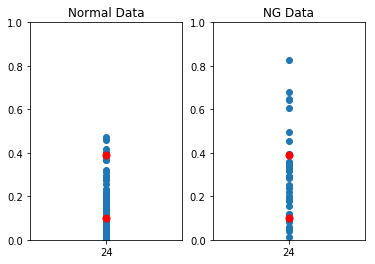

In [475]:
#繪出kmeans結果
tempIndex = 24
#正常資料個數
normalNums = len(outputNormalTransNormal)
#異常資料個數
errNums = len(outputErrTransNormal)

data = KMeansModeTransDataSet[tempIndex]
varId = MajorIndexArr[8]
kmodel = KMeansModelSet[tempIndex]

colName = str(data.columns[0])
data["xColName"] = colName
centroids = kmodel.cluster_centers_

plt.figure()
plt.subplot(1,2,1)

#plt.scatter(data["xColName"], data[varId], marker='o',c= kmodel.labels_.astype(float))
plt.scatter(data["xColName"][0:normalNums], data[varId][0:normalNums], marker='o')

plt.scatter([str(varId),str(varId)], centroids[:], c='red', s=50)
plt.ylim(0.0, 1.0)
plt.title("Normal Data")
plt.subplot(1,2,2)

plt.scatter(data["xColName"][normalNums:], data[varId][normalNums:], marker='o')
plt.scatter([str(varId), str(varId)], centroids[:], c='red', s=50)
plt.ylim(0.0, 1.0)
plt.title("NG Data")
plt.show()

#OutputTransKmeans = OutputTransKmeans.drop(["xColName"], axis=1)



In [354]:
df.loc[[73]]

,N_Err,E_Err,T_Err,N_Err_%,E_Err_%,T_Err_%
73,42,3,45,0.207,0.07,0.183


In [261]:
data[63][5]

0.9999999999999999

In [258]:
data[data[63]==np.float64(1.0)]

,63,dataType,label,xColName


## Outlier Test

In [148]:
#用2倍標準差找出outlier

testIndex =30
OutputTransTemp=None
mean = OutputErrTransNormal.mean(axis=0)
sd = OutputErrTransNormal.std(axis=0)
OutputTransTemp = OutputErrTransNormal.loc[:,[testIndex]]
OutputTransTemp = OutputTransTemp[OutputTransTemp.values > (mean[testIndex] + 2 * sd[testIndex])]
errCount+=len(OutputTransTemp.index.values)
print(OutputTransTemp.index.values)
OutputErrTransNormal= OutputErrTransNormal.drop(OutputTransTemp.index.values)

OutputTransTemp = OutputErrTransNormal.loc[:,[testIndex]]
OutputTransTemp = OutputTransTemp[OutputTransTemp.values < (mean[testIndex] - 2 * sd[testIndex])]
errCount+=len(OutputTransTemp.index.values)
print(OutputTransTemp.index.values)
OutputErrTransNormal= OutputErrTransNormal.drop(OutputTransTemp.index.values)

mean = OutputNormalTransNormal.mean(axis=0)
sd = OutputNormalTransNormal.std(axis=0)
OutputTransTemp = OutputNormalTransNormal.loc[:,[testIndex]]
OutputTransTemp = OutputNormalTransNormal[OutputTransTemp.values > (mean[66] + 2 * sd[testIndex])]
noramalCount+=len(OutputTransTemp.index.values)
print(OutputTransTemp.index.values)
OutputNormalTransNormal= OutputNormalTransNormal.drop(OutputTransTemp.index.values)

OutputTransTemp = OutputNormalTransNormal.loc[:,[testIndex]]
OutputTransTemp = OutputTransTemp[OutputTransTemp.values < (mean[testIndex] - 2 * sd[testIndex])]
noramalCount+=len(OutputTransTemp.index.values)
print(OutputTransTemp.index.values)
OutputNormalTransNormal= OutputNormalTransNormal.drop(OutputTransTemp.index.values)


print(errCount)
print(noramalCount)

[]
[]
[ 19  66 178 187 196]
[]
18
96


# plot

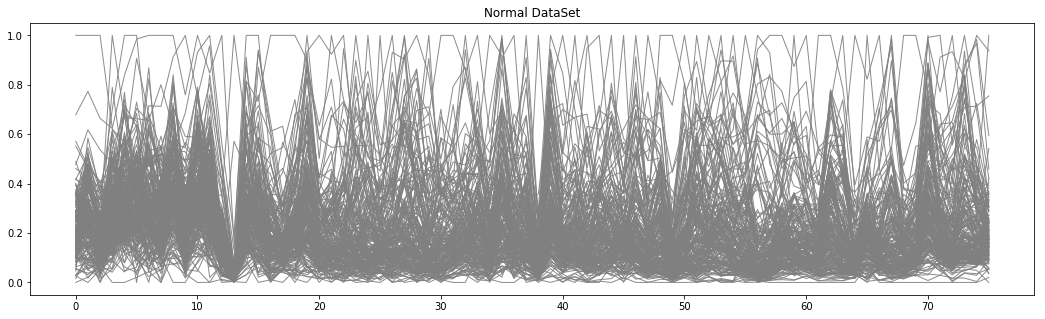

In [44]:
#繪圖
DrawExtractDataLine("Normal DataSet", OutputNormalTransNormal,None, None, False, "")

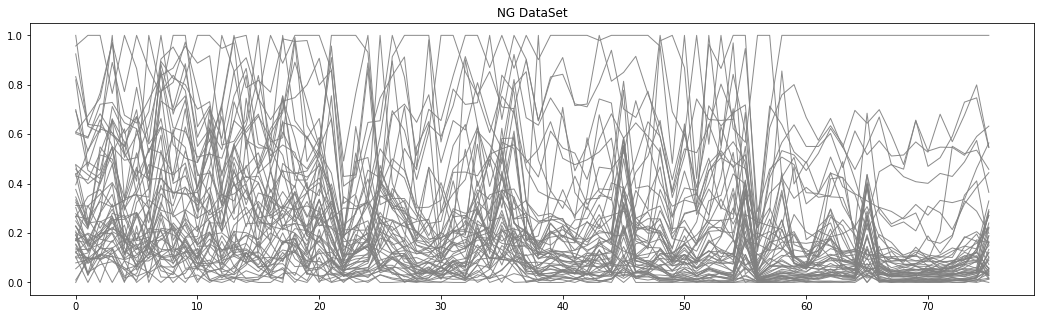

In [45]:
#繪圖
DrawExtractDataLine("NG DataSet", OutputErrTransNormal,None, None, False, "")

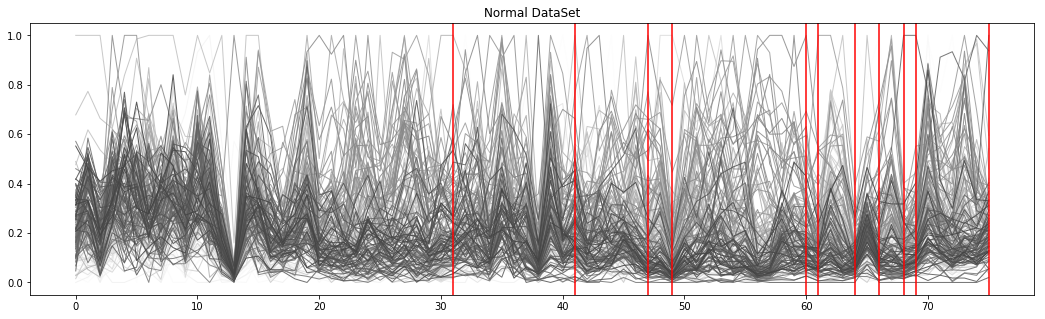

In [41]:
#繪圖
DrawExtractDataLine("Normal DataSet", OutputNormalTransNormal,None, None, True, df.index.values,0)


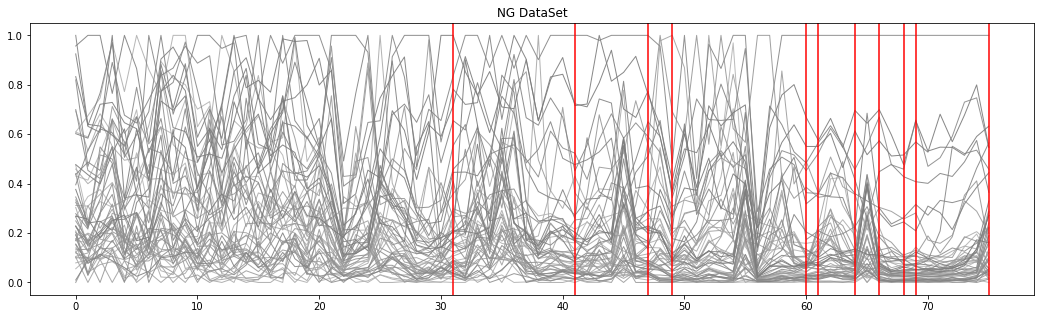

In [42]:
#繪圖
DrawExtractDataLine("NG DataSet", OutputErrTransNormal,None, None, True, df.index.values,100)

In [ ]:
# 隨著資料量逐漸增加，不變的重要特徵有哪些
# 重要特徵評分
#把NGData中的雜質拿掉

## 資料匯出EXCEL

In [17]:
SaveExcel('C:\\ACS\\AI Team\\code\\Save_Excel.xlsx',OutputErrTrans)

## EXCEL資料匯入

In [ ]:
df = pd.read_excel('C:\\ACS\\AI Team\\code\\Save_Excel.xlsx')

## Save Model

In [18]:
import pickle #pickle模块

#保存Model(注:save文件夹要预先建立，否则会报错)
with open('./20190816KMeans.pickle', 'wb') as f:
    pickle.dump(KMeansModelSet, f)

## Read Model

In [19]:
#读取Model
with open('./20190816KMeans.pickle', 'rb') as f:
    KMeansModelSet = pickle.load(f)